In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_moons, make_s_curve

from Autoencoders import ConformalAutoencoder
from helper import load_optimizer_and_scheduler, save_optimizer_and_scheduler
from data import make_half_sphere
from metrics import evaluate_conformality

random_state = 42
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [5]:
# load results from previous experiments
conformal_cosine_results = pd.read_csv("../models/conformal_autoencoder_cosine_comp_halfsphere/results.csv")
conformal_trace_results = pd.read_csv("../models/conformal_autoencoder_trace_comp_halfsphere/results.csv")
conformal_jacobian_results = pd.read_csv("../models/conformal_autoencoder_jacobian_comp_halfsphere/results.csv")
isometric_results = pd.read_csv("../models/isometric_autoencoder_comp_halfsphere/results.csv")
isometric_scaled_results = pd.read_csv("../models/isometric_scaled_autoencoder_comp_halfsphere/results.csv")  

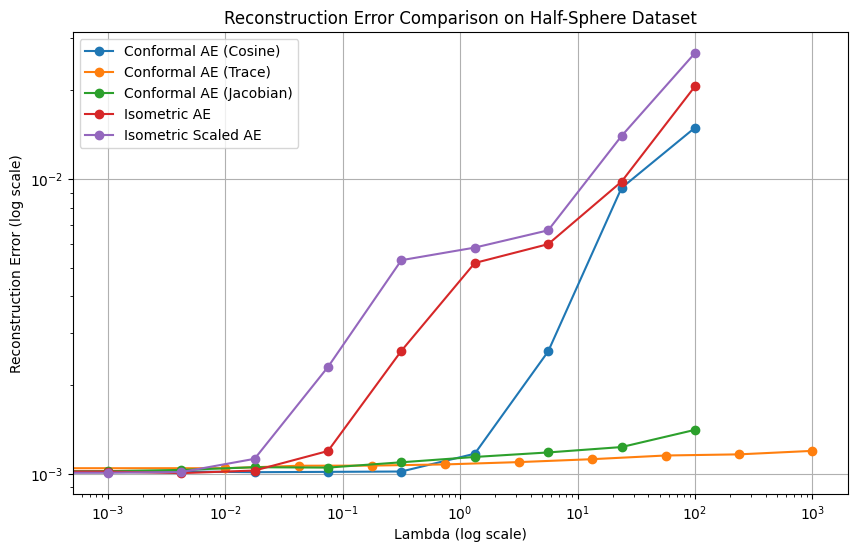

In [3]:
# plot comparison of reconstruction errors
plt.figure(figsize=(10, 6))
plt.plot(conformal_cosine_results["lambda_iso"], conformal_cosine_results["reconstruction_error"], label='Conformal AE (Cosine)', marker='o')
plt.plot(conformal_trace_results["lambda_iso"], conformal_trace_results["reconstruction_error"], label='Conformal AE (Trace)', marker='o')
plt.plot(conformal_jacobian_results["lambda_iso"], conformal_jacobian_results["reconstruction_error"], label='Conformal AE (Jacobian)', marker='o')
plt.plot(isometric_results["lambda_iso"], isometric_results["reconstruction_error"], label='Isometric AE', marker='o')
plt.plot(isometric_scaled_results["lambda_iso"], isometric_scaled_results["reconstruction_error"], label='Isometric Scaled AE', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Reconstruction Error (log scale)')
plt.title('Reconstruction Error Comparison on Half-Sphere Dataset')
plt.legend()
plt.grid(True)
plt.show()

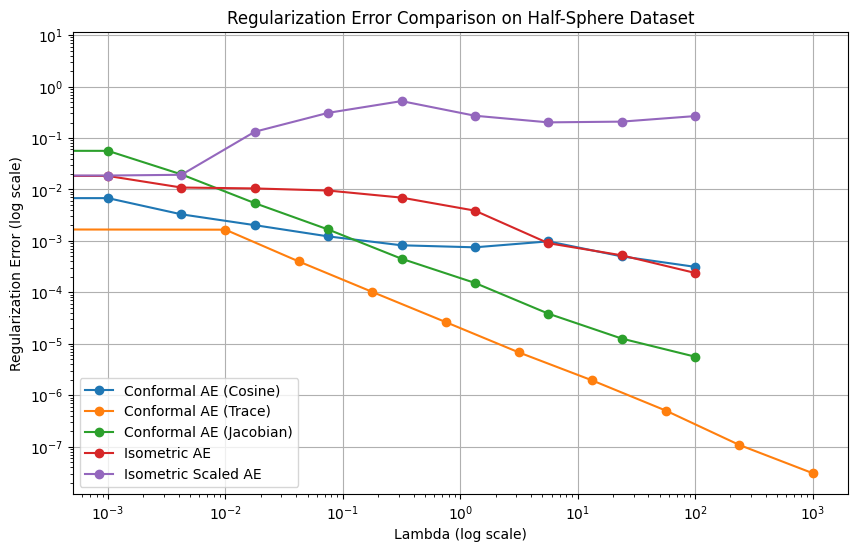

In [4]:
# plot comparison of regularization errors
plt.figure(figsize=(10, 6))
plt.plot(conformal_cosine_results["lambda_iso"], conformal_cosine_results["regularization_error"], label='Conformal AE (Cosine)', marker='o')
plt.plot(conformal_trace_results["lambda_iso"], conformal_trace_results["regularization_error"], label='Conformal AE (Trace)', marker='o')
plt.plot(conformal_jacobian_results["lambda_iso"], conformal_jacobian_results["regularization_error"], label='Conformal AE (Jacobian)', marker='o')
plt.plot(isometric_results["lambda_iso"], isometric_results["regularization_error"], label='Isometric AE', marker='o')
plt.plot(isometric_scaled_results["lambda_iso"], isometric_scaled_results["regularization_error"], label='Isometric Scaled AE', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Regularization Error (log scale)')
plt.title('Regularization Error Comparison on Half-Sphere Dataset')
plt.legend()
plt.grid(True)
plt.show()

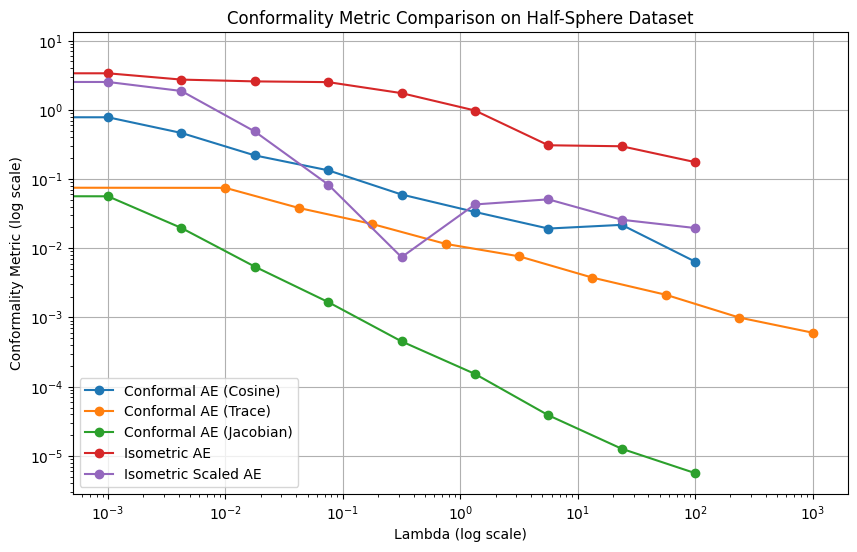

In [5]:
# plot comparison of conformality metrics
plt.figure(figsize=(10, 6))
plt.plot(conformal_cosine_results["lambda_iso"], conformal_cosine_results["conformality_metric"], label='Conformal AE (Cosine)', marker='o')
plt.plot(conformal_trace_results["lambda_iso"], conformal_trace_results["conformality_metric"], label='Conformal AE (Trace)', marker='o')
plt.plot(conformal_jacobian_results["lambda_iso"],  conformal_jacobian_results["conformality_metric"], label='Conformal AE (Jacobian)', marker='o')
plt.plot(isometric_results["lambda_iso"], isometric_results["conformality_metric"], label='Isometric AE', marker='o')
plt.plot(isometric_scaled_results["lambda_iso"], isometric_scaled_results["conformality_metric"], label='Isometric Scaled AE', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Conformality Metric (log scale)')
plt.title('Conformality Metric Comparison on Half-Sphere Dataset')
plt.legend()
plt.grid(True)
plt.show()

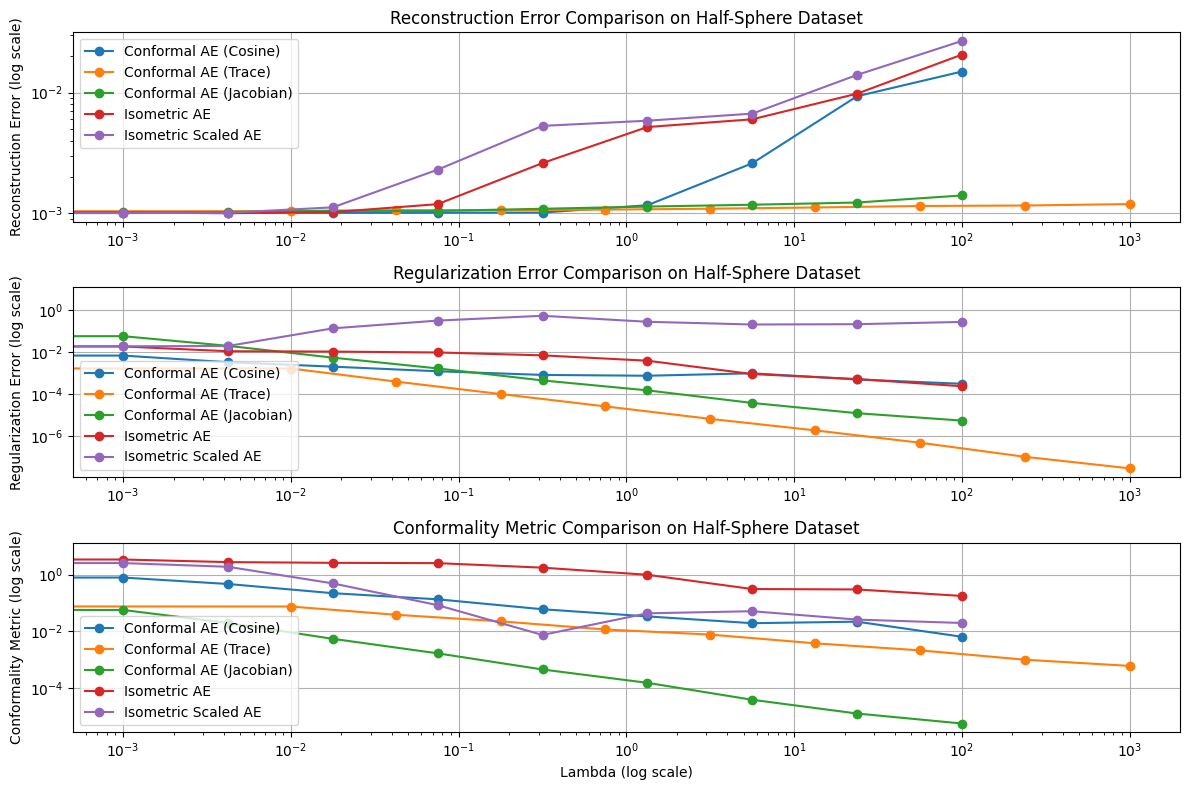

In [6]:
# plot everything in one plot
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(conformal_cosine_results["lambda_iso"], conformal_cosine_results["reconstruction_error"], label='Conformal AE (Cosine)', marker='o')
plt.plot(conformal_trace_results["lambda_iso"], conformal_trace_results["reconstruction_error"], label='Conformal AE (Trace)', marker='o')
plt.plot(conformal_jacobian_results["lambda_iso"], conformal_jacobian_results["reconstruction_error"], label='Conformal AE (Jacobian)', marker='o')
plt.plot(isometric_results["lambda_iso"], isometric_results["reconstruction_error"], label='Isometric AE', marker='o')
plt.plot(isometric_scaled_results["lambda_iso"], isometric_scaled_results["reconstruction_error"], label='Isometric Scaled AE', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Reconstruction Error (log scale)')
plt.title('Reconstruction Error Comparison on Half-Sphere Dataset')
plt.legend()
plt.grid(True)
plt.subplot(3, 1, 2)
plt.plot(conformal_cosine_results["lambda_iso"], conformal_cosine_results["regularization_error"], label='Conformal AE (Cosine)', marker='o')
plt.plot(conformal_trace_results["lambda_iso"], conformal_trace_results["regularization_error"], label='Conformal AE (Trace)', marker='o')
plt.plot(conformal_jacobian_results["lambda_iso"], conformal_jacobian_results["regularization_error"], label='Conformal AE (Jacobian)', marker='o')
plt.plot(isometric_results["lambda_iso"], isometric_results["regularization_error"], label='Isometric AE', marker='o')
plt.plot(isometric_scaled_results["lambda_iso"], isometric_scaled_results["regularization_error"], label='Isometric Scaled AE', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Regularization Error (log scale)')
plt.title('Regularization Error Comparison on Half-Sphere Dataset')
plt.legend()
plt.grid(True)
plt.subplot(3, 1, 3)
plt.plot(conformal_cosine_results["lambda_iso"], conformal_cosine_results["conformality_metric"], label='Conformal AE (Cosine)', marker='o')
plt.plot(conformal_trace_results["lambda_iso"], conformal_trace_results["conformality_metric"], label='Conformal AE (Trace)', marker='o')
plt.plot(conformal_jacobian_results["lambda_iso"], conformal_jacobian_results["conformality_metric"], label='Conformal AE (Jacobian)', marker='o')
plt.plot(isometric_results["lambda_iso"], isometric_results["conformality_metric"], label='Isometric AE', marker='o')
plt.plot(isometric_scaled_results["lambda_iso"], isometric_scaled_results["conformality_metric"], label='Isometric Scaled AE', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Conformality Metric (log scale)')
plt.title('Conformality Metric Comparison on Half-Sphere Dataset')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

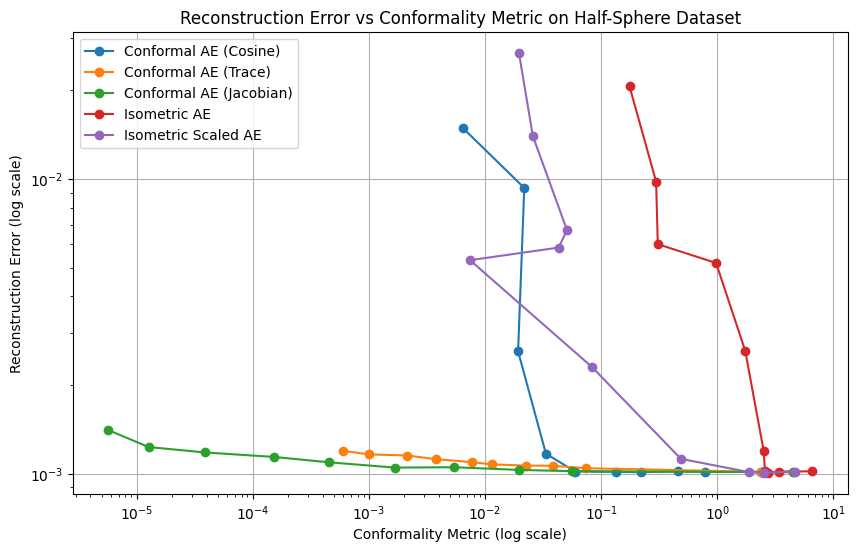

In [7]:
# plot reconstruction error vs conformality metric
plt.figure(figsize=(10, 6))
plt.plot(conformal_cosine_results["conformality_metric"], conformal_cosine_results["reconstruction_error"], label='Conformal AE (Cosine)', marker='o')
plt.plot(conformal_trace_results["conformality_metric"], conformal_trace_results["reconstruction_error"], label='Conformal AE (Trace)', marker='o')
plt.plot(conformal_jacobian_results["conformality_metric"], conformal_jacobian_results["reconstruction_error"], label='Conformal AE (Jacobian)', marker='o')
plt.plot(isometric_results["conformality_metric"], isometric_results["reconstruction_error"], label='Isometric AE', marker='o')
plt.plot(isometric_scaled_results["conformality_metric"], isometric_scaled_results["reconstruction_error"], label='Isometric Scaled AE', marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Conformality Metric (log scale)')
plt.ylabel('Reconstruction Error (log scale)')
plt.title('Reconstruction Error vs Conformality Metric on Half-Sphere Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)
        )
    
    def forward(self, x):
        return self.fc(x)

class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )
    
    def forward(self, z):
        return self.fc(z)

In [3]:
data, labels = make_half_sphere(n_samples=3000, noise=0.05, random_state=random_state)
data = torch.tensor(data, dtype=torch.float32).to(device)
val_data, val_labels = make_half_sphere(n_samples=1000, noise=0.05, random_state=random_state+1)
val_data = torch.tensor(val_data, dtype=torch.float32).to(device)

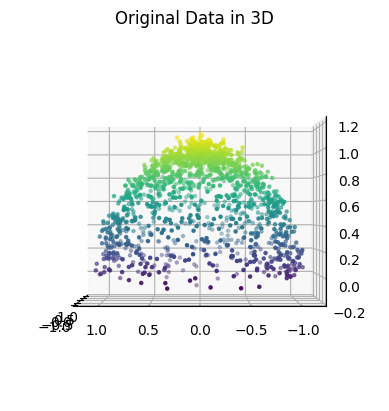

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0].cpu(), data[:, 1].cpu(), data[:, 2].cpu(), c=labels, s=5)
ax.set_title("Original Data in 3D")
ax.view_init(0, 180, 0)
plt.show()

In [5]:
# define model parameters
latent_dim = 2
input_dim = data.shape[1]
output_dim = data.shape[1]
batch_size = 128

train_dataloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)


dir_path = "models/conformal_autoencoder_trace_comp_halfsphere"

In [ ]:
lambda_isos = np.logspace(-2, 3, 9)
lambda_isos = np.concat([np.zeros(1), lambda_isos])

In [7]:
from metrics import conformality_trace_loss

In [8]:
import os

def modelpath(dir_path, lambda_iso, index):
    os.makedirs(dir_path, exist_ok=True)
    return f"{dir_path}/lambda_{lambda_iso:.3f}_model_{index+1}.pth"

In [ ]:
num_epochs = 1000
# train same model multiple times to average results
num_models = 4

recon_errors = []
regularization_errors = []


for i, lambda_iso in enumerate(lambda_isos):
    recon_error = 0
    regularization = 0
    for j in range(num_models):
        print(f"Training model {j+1}/{num_models} with lambda_iso={lambda_iso:.3f}")
        
        encoder = Encoder(input_dim, latent_dim).to(device)
        decoder = Decoder(latent_dim, output_dim).to(device)
        model = ConformalAutoencoder(encoder, decoder, lambda_conf=lambda_iso).to(device)
        model.conformality_loss = conformality_trace_loss

        optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.5)

        # Train the model
        model.train_model(train_dataloader, val_dataloader, batch_size=batch_size, epochs=num_epochs,
                          optimizer=optimizer, scheduler=scheduler, verbose=True)

        # Save the model and optimizer state
        model_path = modelpath(dir_path, lambda_iso, j)
        model.save_checkpoint(model_path)
        print(f"Model {j+1}/{num_models} with lambda_iso={lambda_iso:.3f} trained and saved.")

        # evaluation
        model.eval()
        encoded_data = model.encode(val_data)
        reconstruction = model.decode(encoded_data)
        
        recon_error += nn.MSELoss()(reconstruction, val_data).item()

        regularization += model.conformality_loss(model.decoder, encoded_data).item()
    
    recon_errors.append(recon_error/ num_models)
    regularization_errors.append(regularization/num_models)
    

Training model 1/4 with lambda_iso=0.000


/home/maxheise/anaconda3/envs/ML/lib/python3.13/site-packages/torch/autograd/graph.py:824: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:181.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch [100/1000], Loss: 0.00095580, Reconstruction Loss: 0.00095580, Conformal Loss: 0.42344236, Regularization Loss: 0.02960313
Epoch [100/1000], Validation Loss: 0.00107796, Reconstruction Loss: 0.00107796, Conformal Loss: 0.38223588, Regularization Loss: 0.03016000
Epoch [200/1000], Loss: 0.00081226, Reconstruction Loss: 0.00081226, Conformal Loss: 0.46055543, Regularization Loss: 0.01411615
Epoch [200/1000], Validation Loss: 0.00103023, Reconstruction Loss: 0.00103023, Conformal Loss: 0.43256277, Regularization Loss: 0.03061801
Epoch [300/1000], Loss: 0.00079758, Reconstruction Loss: 0.00079758, Conformal Loss: 0.46265757, Regularization Loss: 0.01080187
Epoch [300/1000], Validation Loss: 0.00102428, Reconstruction Loss: 0.00102428, Conformal Loss: 0.45579189, Regularization Loss: 0.01973224
Epoch [400/1000], Loss: 0.00079029, Reconstruction Loss: 0.00079029, Conformal Loss: 0.46480846, Regularization Loss: 0.01962416
Epoch [400/1000], Validation Loss: 0.00102020, Reconstruction Lo

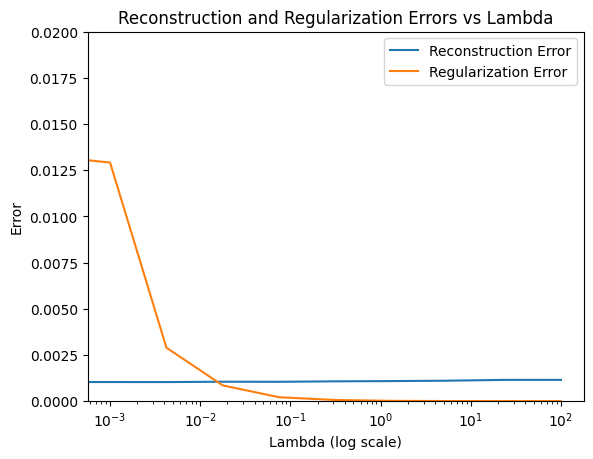

In [10]:
plt.plot(lambda_isos, recon_errors, label='Reconstruction Error')
plt.plot(lambda_isos, regularization_errors, label='Regularization Error')
plt.ylim(0, 0.02)
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Error')
plt.title('Reconstruction and Regularization Errors vs Lambda')
plt.legend()
plt.show()

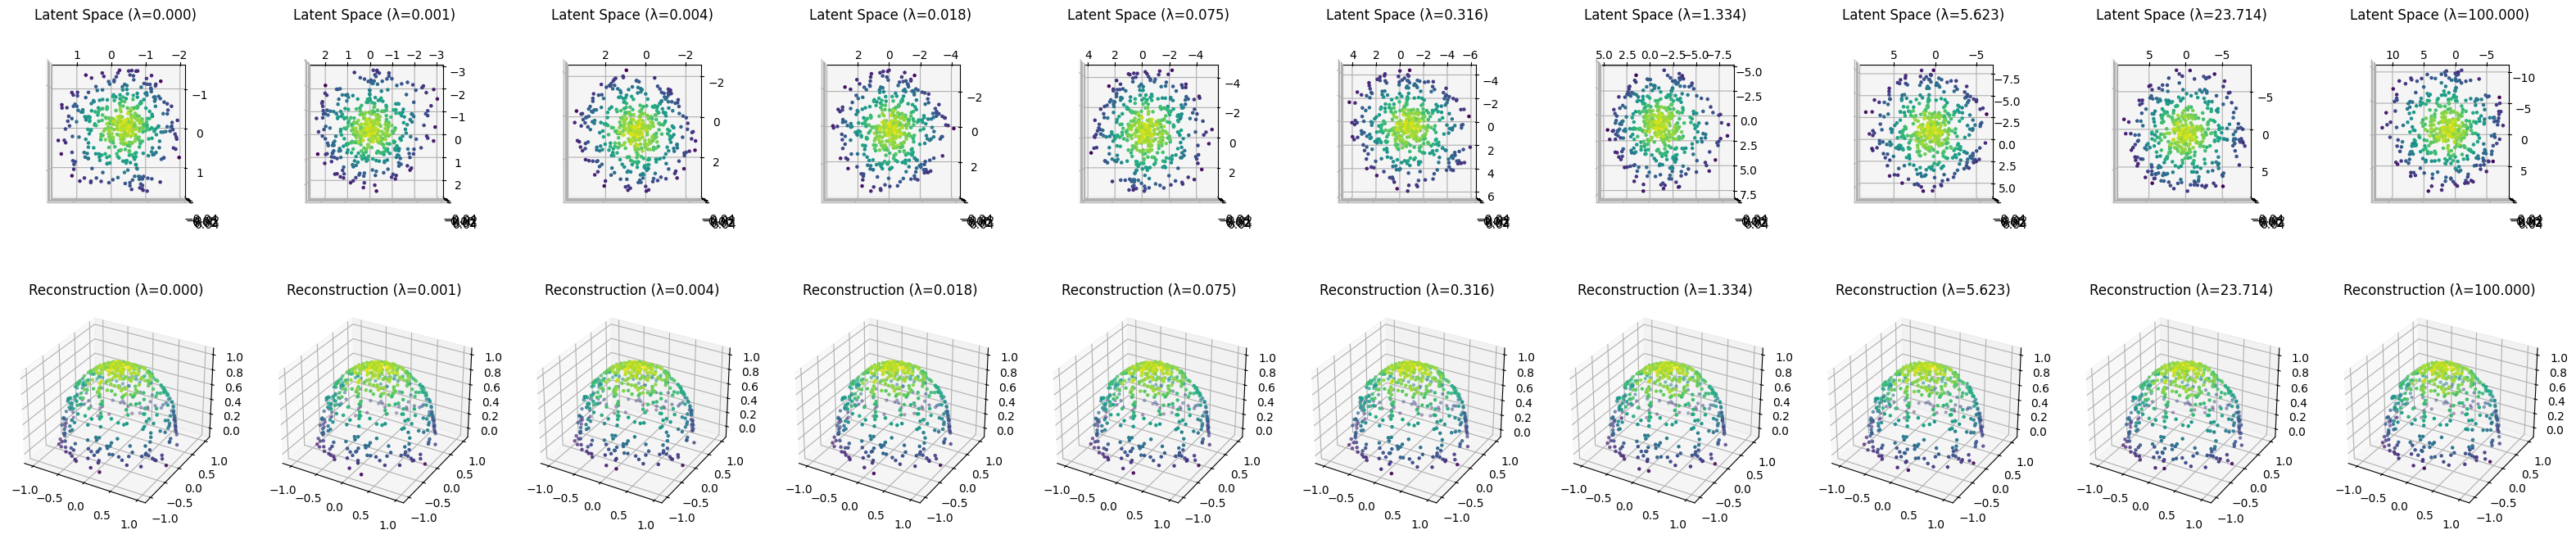

In [11]:
# plot samples and latent space at different lambdas
fig, axs = plt.subplots(2, 10, figsize=(40, 8), subplot_kw=dict(projection='3d'))
for i, lambda_iso in enumerate(lambda_isos):
    model_path = modelpath(dir_path, lambda_iso, 2)
    model = ConformalAutoencoder(Encoder(input_dim, latent_dim), Decoder(latent_dim, output_dim), lambda_conf=lambda_iso).to(device)
    model.load_state_dict(torch.load(model_path))
    
    model.eval()
    with torch.no_grad():
        encoded_data = model.encode(val_data)
        reconstruction = model.decode(encoded_data)

    axs[0, i].scatter(encoded_data[:, 0].cpu(), encoded_data[:, 1].cpu(), c=val_labels, s=5)
    axs[0, i].set_title(f'Latent Space (λ={lambda_iso:.3f})')
    axs[0, i].view_init(90, 90, 0)
    # axs[0, i].set_xticks([])
    # axs[0, i].set_yticks([])
    #plot 3d data
    axs[1, i].scatter(reconstruction[:, 0].cpu(), reconstruction[:, 1].cpu(), reconstruction[:, 2].cpu(), c=val_labels, s=5)
    axs[1, i].set_title(f'Reconstruction (λ={lambda_iso:.3f})')

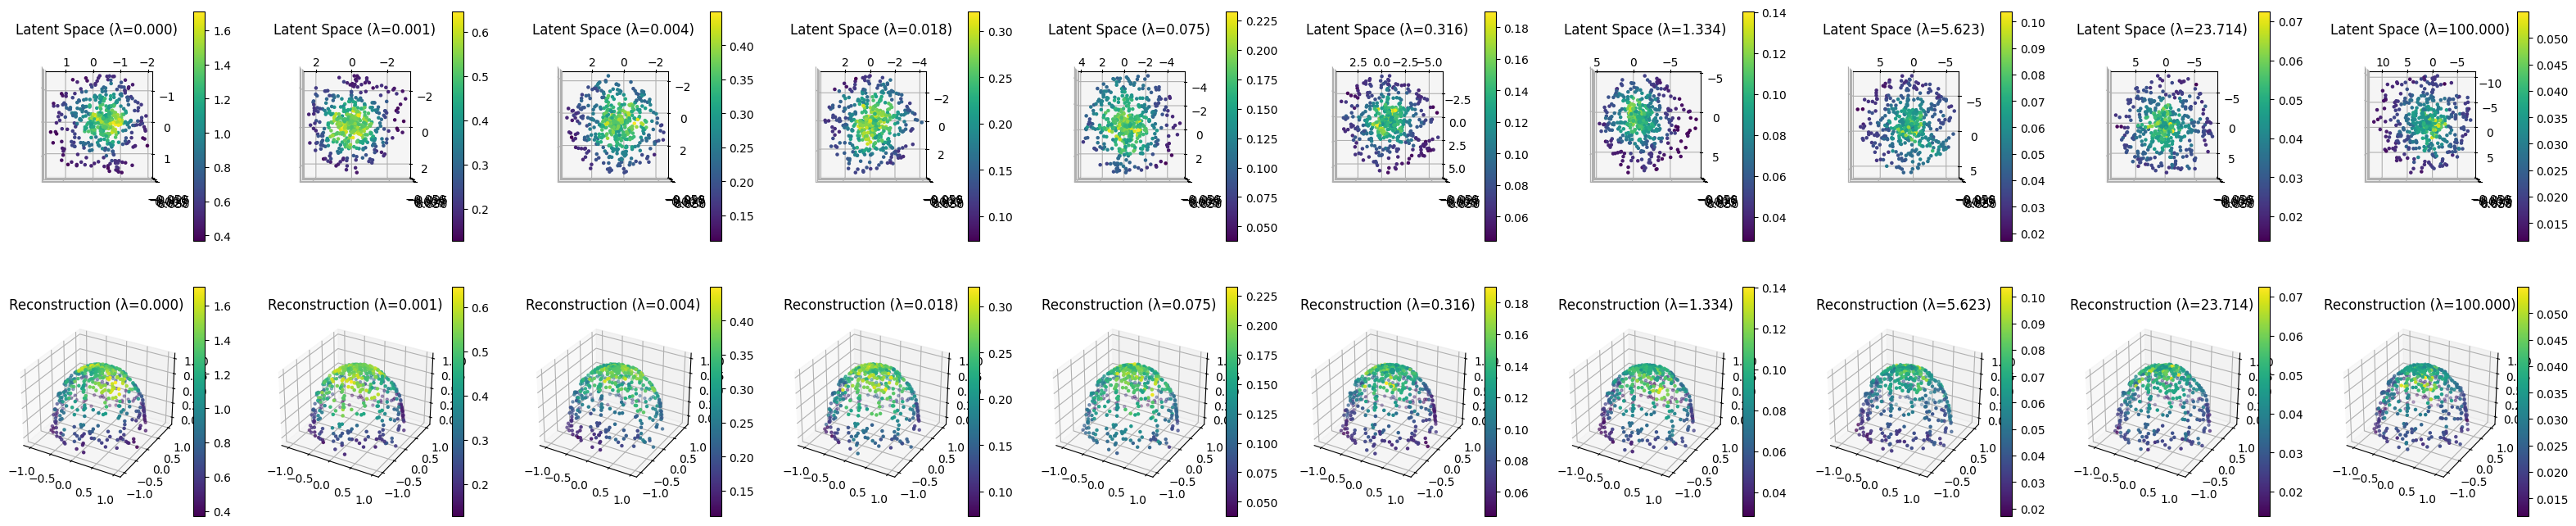

In [12]:
fig, axs = plt.subplots(2, 10, figsize=(40, 8), subplot_kw=dict(projection='3d'))
for i, lambda_iso in enumerate(lambda_isos):
    model_path = modelpath(dir_path, lambda_iso, 2)
    model = ConformalAutoencoder(Encoder(input_dim, latent_dim), Decoder(latent_dim, output_dim), lambda_conf=lambda_iso).to(device)
    model.load_state_dict(torch.load(model_path))
    
    model.eval()
    with torch.no_grad():
        encoded_data = model.encode(val_data)
        reconstruction = model.decode(encoded_data)

    trace_vals = np.zeros_like(encoded_data[:, 0].cpu())
    for j, z in enumerate(encoded_data):
        z = z.unsqueeze(0)  # Add batch dimension
        y = model.decode(z)  # Decode to get reconstruction
        y = y.squeeze(0)  # Remove batch dimension

        # Compute the Jacobian J of the decoder at point z
        J = torch.autograd.functional.jacobian(model.decode, z)[0,:,0,:]

        # Compute the trace of J^T J
        JtJ = J.T @ J
        trace_JtJ = torch.trace(JtJ)

        # Store the trace value as a label for the point
        trace_vals[j] = trace_JtJ.item() / JtJ.shape[0]  # Normalize by the number of dimensions

    p = axs[0, i].scatter(encoded_data[:, 0].cpu(), encoded_data[:, 1].cpu(), c=trace_vals, s=5)
    plt.colorbar(p)
    axs[0, i].set_title(f'Latent Space (λ={lambda_iso:.3f})')
    axs[0, i].view_init(90, 90, 0)
    # axs[0, i].set_xticks([])
    # axs[0, i].set_yticks([])
    #plot 3d data
    p = axs[1, i].scatter(reconstruction[:, 0].cpu(), reconstruction[:, 1].cpu(), reconstruction[:, 2].cpu(), c=trace_vals, s=5)
    plt.colorbar(p)
    axs[1, i].set_title(f'Reconstruction (λ={lambda_iso:.3f})')

In [13]:
statses = []
for i, lambda_iso in enumerate(lambda_isos):
    model_path = modelpath(dir_path, lambda_iso, 2)
    model = ConformalAutoencoder(Encoder(input_dim, latent_dim), Decoder(latent_dim, output_dim), lambda_conf=lambda_iso).to(device)
    model.load_state_dict(torch.load(model_path))
    
    model.eval()
    with torch.no_grad():
        encoded_data = model.encode(val_data)
        reconstruction = model.decode(encoded_data)

    statses.append(evaluate_conformality(model, data))

df = pd.DataFrame(statses, index=lambda_isos)
# styled_df = df.style.highlight_min(color='green').highlight_max(color='coral')

In [14]:
styled_df = df.style \
    .background_gradient(subset=[
            'reconstruction_error',
            'diagonal_gini',
            'lambda_std',
            'lambda_std_normed',
            'off_diag_mean',
            'off_diag_norm',
            'off_diag_mean_normed',
            'off_diag_norm_normed',
            'jTj_minus_lambdaI_mean',
            'jTj_minus_lambdaI_norm',
            'jTj_minus_lambdaI_mean_normed',
            'jTj_minus_lambdaI_norm_normed',
            'determinant_vs_estimate_std',
            ], cmap='Reds') \
    .background_gradient(subset=[
        'determinant_vs_estimate_mean'
    ], cmap='Greens')\
    .background_gradient(subset=[
        'lambda_mean',
        'latent_std',
        'latent_std_max',
        'latent_std_min',
        'latent_norm',
    ], cmap='Blues')

styled_df

KeyError: "None of [Index(['reconstruction_error', 'diagonal_gini', 'lambda_std',\n       'lambda_std_normed', 'off_diag_mean', 'off_diag_norm',\n       'off_diag_mean_normed', 'off_diag_norm_normed',\n       'jTj_minus_lambdaI_mean', 'jTj_minus_lambdaI_norm',\n       'jTj_minus_lambdaI_mean_normed', 'jTj_minus_lambdaI_norm_normed',\n       'determinant_vs_estimate_std'],\n      dtype='object')] are in the [columns]"